#  Activity 1. K-Nearest Neighbour Classifier
### Background
In this activity, we learn how <a href="https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/">K-Nearest Neighbors (KNN)</a> classifier works. KNN is a simple non-parametric model (ironically non-parametric here means infinite number of parameters), which is an example of <a href="https://en.wikipedia.org/wiki/Instance-based_learning">instance-based</a> supervised learning. We will use KNN as a vehicle to practice some of the basic concepts of machine learning. KNN is a <a href="https://en.wikipedia.org/wiki/Lazy_learning">lazy learner</a> that stores all training data points and their labels in memory, and predict the class label for a new data point based on its similarity to the training data (in fact the stored training data points can be considered as parameters).

Consider a training dataset containing (x,t) pairs where $x$ is the input and $t$ is the target class label. Suppose we are given a similarity measure $sim(x_1,x_2)$ which gives the similarity score when fed with two data points. Given a test data point x, the K-nearest neighbour classifier works as follows:
<ul>
	<li>Select the top K most similar data points to x from the training set</li>
	<li>Look at the label of the K-nearest neighbours and select the label which has the majority vote.</li>
</ul>
If the classes are equally common among the neighbours (e.g., two positive and two negative neighbours in binary classification when K=4), the test datapoint is randomly assigned to one of the classes. For example, Figure <strong>A.1</strong> (below) illustrates such situation where the test datapoint (shown by <span style="color: #00ff00;">green</span>) has exactly two neighbours from each class (marked by <span style="color: #ff0000;">red</span> and <span style="color: #3366ff;">blue</span>).

<a href="http://www.saedsayad.com/k_nearest_neighbors.htm" rel="attachment wp-att-92100"><img class="wp-image-92100 size-full" src="https://www.alexandriarepository.org/wp-content/uploads/20160413152921/A.1.png" alt="Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm" width="497" height="274" /></a> 

> Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm

### Further Materials
This short <a href="https://www.youtube.com/watch?v=UqYde-LULfs">YouTube video</a> explains KNN and related concepts in a very simple language.

# Steps for Activity 1
<ol>
	<li>Load the iris dataset and divide it to separate training and testing sets,</li>
    <li>Define a function that calculates the majority vote,</li>
    <li>Define KNN function that takes training labeled samples, testing samples, $K$ and a distance metric and predicts the class labels for the testing samples,</li>
	<li>Apply KNN where for some values of $K$ and report training and testing error</li>
	<li>Plot training and testing error versus $1/K$ where $K \in \{1,\cdots,100\}$</li>
</ol>

# Implementation of the Above Steps
Here, we implement a basic KNN classifier. Note that in Assignment 1, you will be asked to expand this implementation and build a KNN regressor. In this task, we use a simple, yet very popular, dataset to investigate the performance of our KNN. 

### Load and Explor Data
Let us start with loading the libraries and dataset.

In [2]:
#install.packages("reshape2")
#install.packages("ggplot2")
#install.packages("corrplot")
library(reshape2)
library(ggplot2)
library(corrplot)
# Load data: it's built in to R, however, you can also get it online
# iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE)
library(datasets)
data(iris)
# take a look at the data
head(iris)
# Shown are 4 measurements (petal & sepal width & length) for 3 species of iris flowers, where sepal is: 
# "One of the usually separate, green parts that surround and protect the flower bud" (or petals)

corrplot 0.84 loaded


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
dim(iris) # 150 x 5 records

[1] 150   5

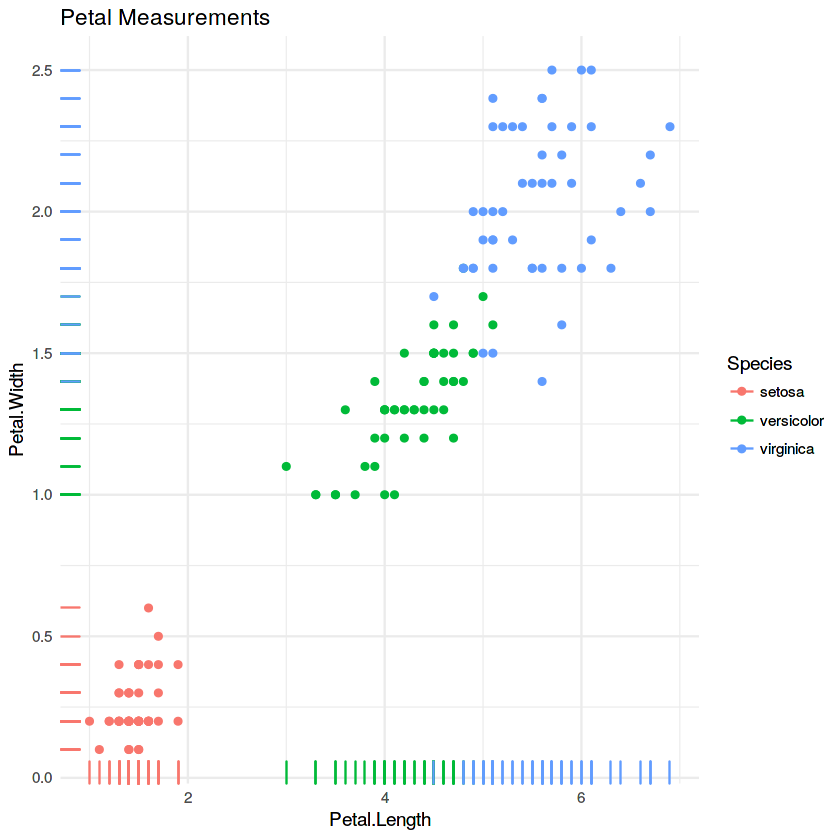

In [5]:
library("Cairo")
#a few visualizations wont hurt!
## the followin plot illustrates petal measurments:
ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) +  # plot Width vs Length by Species 
    geom_point() + # Make it a scatter with points
geom_rug()+  # add the lines
theme_minimal() + ggtitle("Petal Measurements")

In [ ]:
## and this one shows the correlation between the features (input variables)
#corrplot.mixed(cor(iris[,-5]), lower="ellipse", upper="number")

### Training and Testing Sets

In [6]:
# set random seed
set.seed(1234)

# permute iris, shuffle or mix them up
# First input to sample requires a vector of numbers i.e. c(1,2,3)..etc. Use 1:nrow(iris) to achieve the same result
# The second argument is sample size so in this case we want to randomly sample everything to effectively shuffle them
iris <- iris[sample(1:nrow(iris),nrow(iris)),]


# create  training and testing subsets:
# This is done by setting the training data to the first 100 rows and then creating 2 objects (dataframes) for each
# of the training and test sets. The first object has all of the measurements being used for KNN and the second
# has the label reference for Species.

# It is important here to recognise that the "iris" object created above has been changed because of the shuffle. Therefore
# The index numbers that appear in the right hand column of the output are not the same as the actual index numbers. This is
# because the shuffled dataframe was saved as the same object and has a new index but still shows the old index numbers
# in the output.

train.index = 1:100
train.data <- iris[train.index, -5] # grab the first 100 records, leave out the species (last column)
train.label <- iris[train.index, 5]
test.data <- iris[-train.index, -5] # grab the last 50 records, leave out the species (last column)
test.label <- iris[-train.index, 5]

dim(train.data) # 100 records
dim(test.data) # 50 records

[1] 100   4

[1] 50  4

In [7]:
head(iris) # the shuffled records - notice the number on the left is not in sequential order. The actual index is.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
18,5.1,3.5,1.4,0.3,setosa
93,5.8,2.6,4.0,1.2,versicolor
91,5.5,2.6,4.4,1.2,versicolor
92,6.1,3.0,4.6,1.4,versicolor
126,7.2,3.2,6.0,1.8,virginica
149,6.2,3.4,5.4,2.3,virginica


In [8]:
head(train.data) # the first 100 records without the Species - again note the index

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
18,5.1,3.5,1.4,0.3
93,5.8,2.6,4.0,1.2
91,5.5,2.6,4.4,1.2
92,6.1,3.0,4.6,1.4
126,7.2,3.2,6.0,1.8
149,6.2,3.4,5.4,2.3


### Majority Vote

In [13]:
# define an auxiliary function that calculates the majority votes (or mode!)

# This function takes a list of labels and returns the factor label for the species that occurs the most often in 
# the passed list.
# example: 
#   input: x <- train.label[c(1,2,3)] which is (setosa,ersicolor,versicolor) - look at the output in the above cell for the actual values
#   output: versicolor - versiclor appears 2 times in the first 3 records of the train data 

majority <- function(x) {  # Pass the value x which is a dataframe of labels from K nn values
   
    # grab the unique values for the labels in x
    uniqx <- unique(x)
    
    # Count each unique label that appears and grab the one with the largest values
    uniqx[which.max(tabulate(match(x, uniqx)))]
}

# Alternative approach to this with slightly less code:

library(plyr)
majority_alt <- function(x) {
    
    
    cnt <- count(x)  # use plyr to create a table of counts by values appearing in x
    
    cnt[which.max(cnt$freq),1]  # simply find the row that has the maximum value in the $freq column 
                              # created by the count function but we only want to return the first column with the label
     
}



### KNN Classifier

In [14]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)

knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    ## Combine the test and train sets into a single frame to calculate distances. We want to see for each 
    ## item in the test dataset how far each and every item in the training data set is from those measurements.
    
    ## Therefore, by saving it as a matrix that only includes the test values as rows and the train values as columns
    ## it creates a matrix of test rows where each row includes every training value's distance. Everything is stored
    ## by the index of the data rather than the data itself so it can be looked up in the original datasets
    
    
    dist_data <- rbind(test.data, train.data)  # combine training and test data (order is important)
    
    dist <- dist(dist_data, method= distance)  # calculate the distnaces using the dist function on the combined set
    
    # convert to a matrix but only take some values
    # The first argument for rows is the test rows which were added to the rbind command first and therefore represent
    # the index 1: onwards. To calculate the exact distance we use the length calculated earlier.
    # The second argument represents the columns in the maxtrix which start after the test columns. Therefore we take test
    # len + 1 to the length of the full training set. This ensures we only keep test rows x train columns
    
    dist <- as.matrix(dist)[1:test.len, (test.len+1):(test.len+train.len)] 
    
    ## for each test sample...
    for (i in 1:test.len){
        
        ### ...find its K nearest neighbours from training sampels...
        ## Sorting it by i means the shortest distancs are in order, then it is a simple matter of selecting only K values
        ## and storing those values. Again we store the index for searching rather than actual values. Remember that the original
        ## iris data set was randomly changed at the beginning so the old index displays out of order. The actual index referred
        ## to here is the new index created and therefore will always return the right values
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]  # index.return is what returns the index
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (majority(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

In [189]:
## Alternative to the loop in the previous cell. Creates a vectorized version and applies at one time. Simply return this
## as a list from the knn function to get the same result.

find_x <- function(x) {
    
    nn <- as.data.frame(sort(x, index.return = TRUE))[1:K,2]  # Same as inside the loop we create the sorted frame and select K
    test.label <- (majority(train.label[nn]))  # Run the majority function over the labels found in nn
    
    return(test.label)  # simply return the labels
    
}

as.data.frame(apply(dist,1,find_x))[,1] # apply the function to every row in dist and return it as a list of values
               
      
    




[1] virginica  virginica  setosa     virginica  virginica  versicolor
 [7] versicolor versicolor setosa     virginica  versicolor versicolor
[13] versicolor versicolor versicolor virginica  versicolor versicolor
[19] versicolor versicolor virginica  setosa     versicolor virginica 
[25] virginica  virginica  setosa     setosa     setosa     versicolor
[31] versicolor virginica  setosa     versicolor setosa     versicolor
[37] virginica  setosa     versicolor virginica  versicolor setosa    
[43] virginica  virginica  virginica  versicolor virginica  setosa    
[49] versicolor setosa    
Levels: setosa versicolor virginica

In [15]:
# let see what is the prediciton of our knn for test samples when K=4
knn(train.data, train.label, test.data, K=4)

[1] virginica  virginica  setosa     virginica  virginica  versicolor
 [7] versicolor versicolor setosa     virginica  versicolor versicolor
[13] versicolor versicolor versicolor virginica  versicolor versicolor
[19] versicolor versicolor virginica  setosa     versicolor virginica 
[25] virginica  virginica  setosa     setosa     setosa     versicolor
[31] versicolor virginica  setosa     versicolor setosa     versicolor
[37] virginica  setosa     versicolor virginica  versicolor setosa    
[43] virginica  virginica  virginica  versicolor virginica  setosa    
[49] versicolor setosa    
Levels: setosa versicolor virginica

In [196]:
# and a confusion matrix for K = 5
prop.table(table(knn(train.data, train.label, test.data, K=5), test.label))*100


            test.label
             setosa versicolor virginica
  setosa         24          0         0
  versicolor      0         40         2
  virginica       0          2        32

            test.label
             setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         20         1
  virginica       0          1        16

In [19]:
# calculate the train and test missclassification rates for K in 1:100 
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!

# Create's a dataframe of zeros for K=1-100. 
miss <- data.frame('K'=1:100, 'train'=rep(0,100), 'test'=rep(0,100))


K,train,test
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0


In [20]:
## For each value of K, evaluate the output of KNN for the value K that are not equal to train.label or test.label.
## This equates to TRUE/FALSE and therefore can be summed. Taking the proportion of total data creates a %

for (k in 1:100){
    miss[k,'train'] <- sum(knn(train.data, train.label, train.data, K=k) != train.label)/nrow(train.data)*100
    
    miss[k,'test'] <-  sum(knn(train.data, train.label, test.data, K=k)  != test.label)/nrow(test.data)*100
}

## An alterantive to this is to use apply again over the table to calculate each column and avoid the loop.


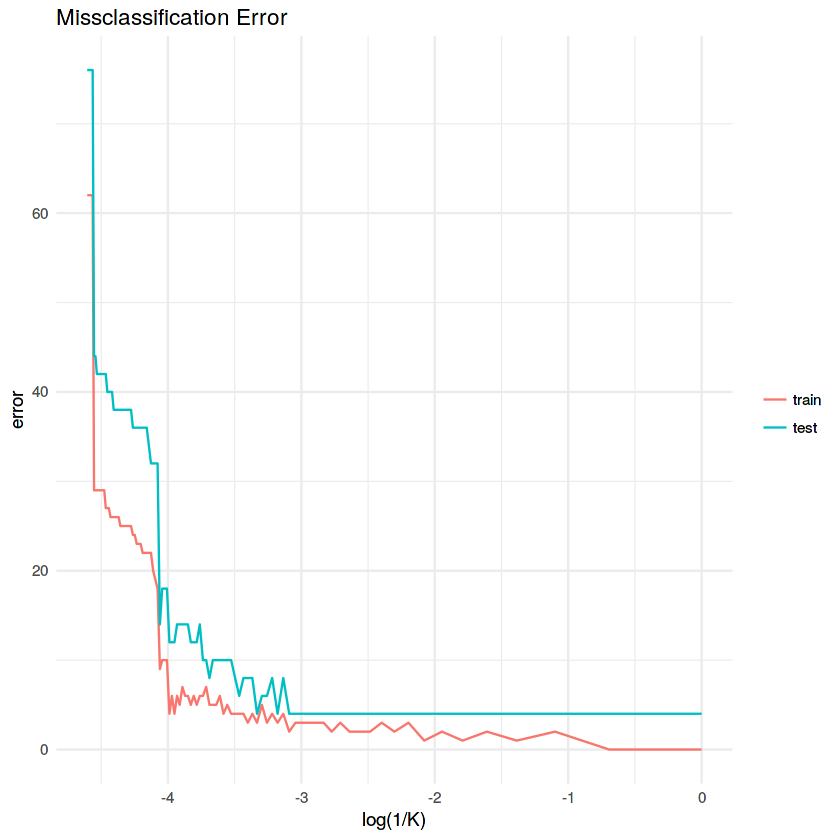

In [21]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')

ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

<h1>Discussions</h1>
<ol>
	<li>As $K$ increases, does the complexity of the KNN classifier increase or decrease?</li>
	<li>What is the relationship between $1/K$ and the training error?</li>
	<li>What is the relationship between $1/K$ and the testing error?</li>
	<li>How do you explain the difference between training and testing error trends as the complexity of the KNN classifier increases?</li>
    <li>Can you tell the areas where the model overfits and underfits? What is the best value for $K$?</li>
	</ol>

In [28]:
which.min(miss$test)

[1] 1